In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [28]:
url = "https://raw.githubusercontent.com/soumya-mishra/Heart-Disease_DT/main/heart_v2.csv"
df = pd.read_csv(url)
df

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0
...,...,...,...,...,...
265,52,1,172,199,0
266,44,1,120,263,0
267,56,0,140,294,0
268,57,1,140,192,0


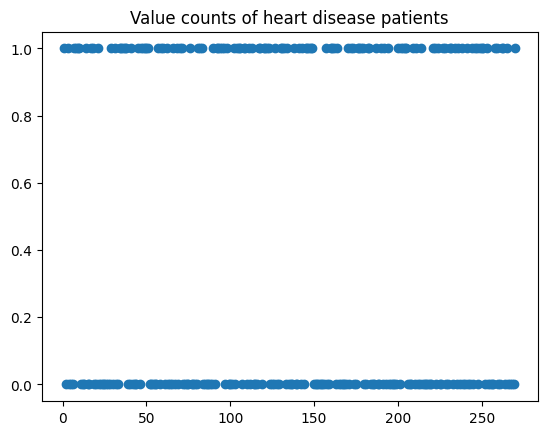

In [29]:
plt.scatter([range(1,df.shape[0]+1)], df['heart disease'])
plt.title('Value counts of heart disease patients')
plt.show()

In [30]:
X = df.drop('heart disease', axis=1)
y = df['heart disease']

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape)

(216, 4) (216,)


In [32]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(
random_state=42, 
n_jobs=-1, 
max_depth=5,
n_estimators=100,
oob_score=True)

In [33]:
%%time
classifier.fit(X_train, y_train)

CPU times: total: 281 ms
Wall time: 244 ms


RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [34]:
classifier.oob_score_

0.6481481481481481

In [35]:
## Hyperparameter tuning
rf = RandomForestClassifier(random_state=42, n_jobs=-1, oob_score=True)

param_grid = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

In [36]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(
    estimator=rf, 
    param_grid=param_grid,
    cv=4,
    n_jobs=-1,
    verbose=1,
    scoring="accuracy"
)

In [37]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits
CPU times: total: 3.31 s
Wall time: 35.1 s


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(n_jobs=-1, oob_score=True,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [42]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=2, min_samples_leaf=5, n_jobs=-1,
                       oob_score=True, random_state=42)

[Text(0.5, 0.8333333333333334, 'BP <= 139.0\ngini = 0.481\nsamples = 133\nvalue = [129, 87]\nclass = Disease'),
 Text(0.25, 0.5, 'age <= 52.5\ngini = 0.418\nsamples = 88\nvalue = [99, 42]\nclass = Disease'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, 'gini = 0.299\nsamples = 45\nvalue = [58, 13]\nclass = Disease'),
 Text(0.375, 0.16666666666666666, 'gini = 0.485\nsamples = 43\nvalue = [41.0, 29.0]\nclass = Disease'),
 Text(0.75, 0.5, 'age <= 50.5\ngini = 0.48\nsamples = 45\nvalue = [30, 45]\nclass = No Disease'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, 'gini = 0.153\nsamples = 7\nvalue = [1, 11]\nclass = No Disease'),
 Text(0.875, 0.16666666666666666, 'gini = 0.497\nsamples = 38\nvalue = [29, 34]\nclass = No Disease')]

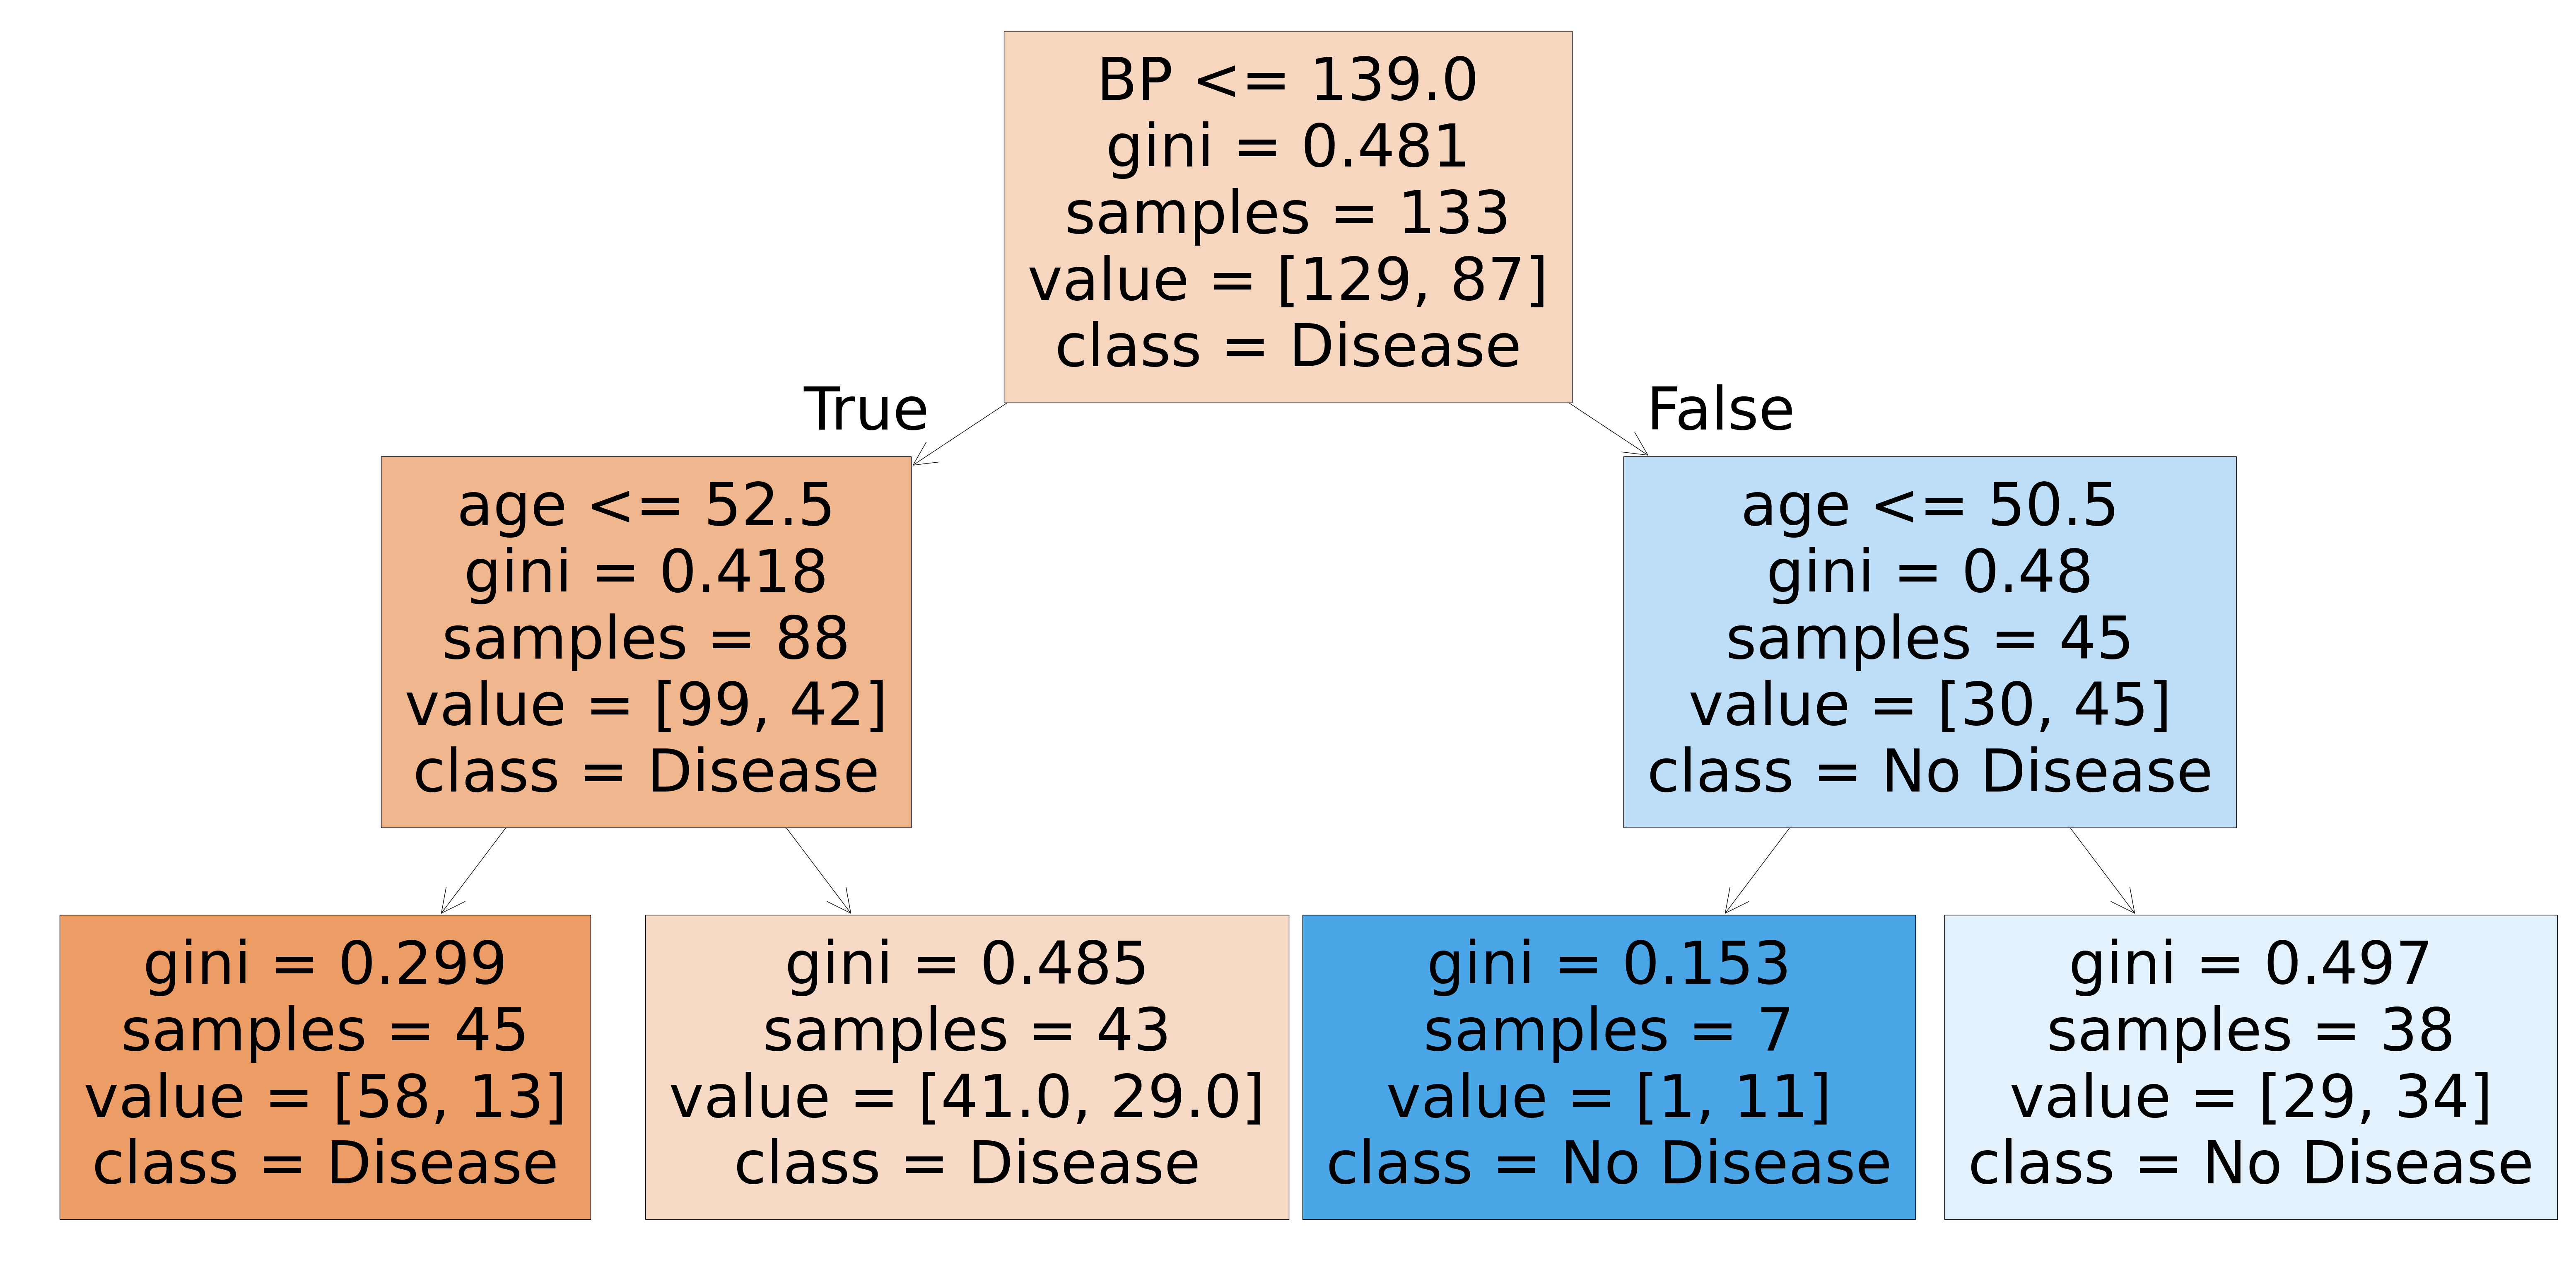

In [43]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(rf_best.estimators_[5], feature_names=X.columns, class_names=['Disease', "No Disease"], filled=True)